In [68]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [69]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [70]:

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

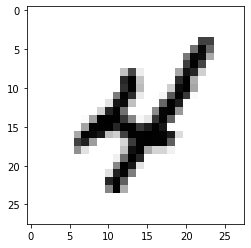

In [71]:
plt.imshow(x_train[9],cmap='binary')

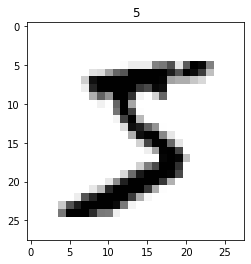

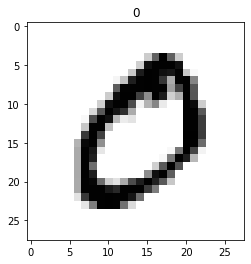

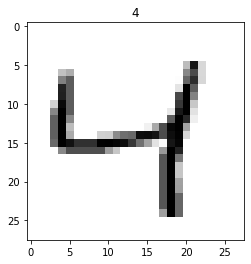

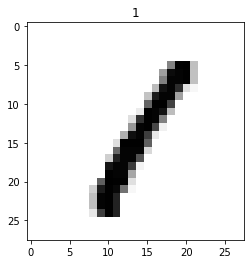

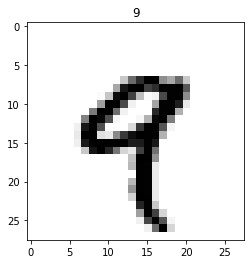

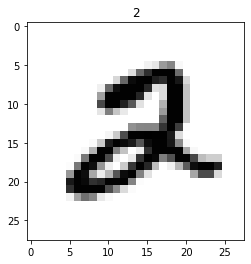

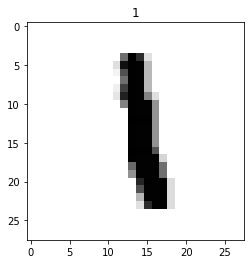

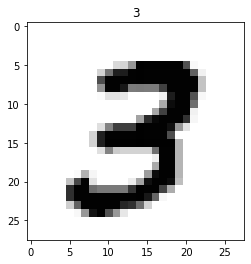

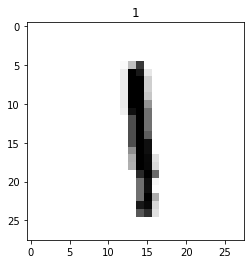

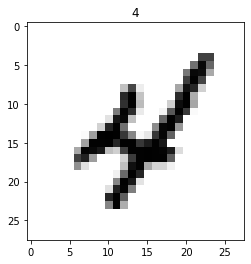

In [58]:
def output(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()
    
for i in range(10):
    output(i)

# preprocessing image

In [72]:
x_train=x_train.astype(np.float)/255
x_test=x_test.astype(np.float)/255

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)


In [73]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [74]:
y_train.shape , y_test.shape

((60000,), (10000,))

# make y output into one vector

In [75]:
from keras.utils import np_utils


y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)


In [76]:
y_train
#where value is present value will be one

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# build a model

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

In [80]:
model = Sequential()
#kernel size is 3,3
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D(2,2))
#window size 2,2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

#flatten to 784 pixels

model.add(Flatten())
model.add(Dropout(0.25))
#to avoid overfitting
model.add(Dense(10,activation='softmax'))
#classification layer
#10 neurons since we have 10 number of classes

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

# Compile the model

In [82]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [51]:
# from keras.callbacks import EarlyStopping,ModelCheckpoint
# es= EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)
# mc=ModelCheckpoint('./bestmodel.h5',monitor='val_acc',verbose=1,save_best_only=True)
# cb = [es,mc]

# Model Training

In [83]:
his=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 77s 30ms/step - loss: 0.4002 - accuracy: 0.8748
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0652 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0479 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0342 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0217 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0186 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 50s 27m

In [ ]:
# model_s = keras.models.load_model(r"C:\Users\Hp\handwritten-digit-recognition-MNIST.ipynb")


# Test model

In [84]:
#this accuracy less than the one on training data means its overfitting change values of epoch
test_loss,test_acc= model.evaluate(x_train,y_train,verbose=1)
print("the accuracy ", test_acc)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0080 - accuracy: 0.9977
the accuracy  0.9976666569709778


# prediction

five


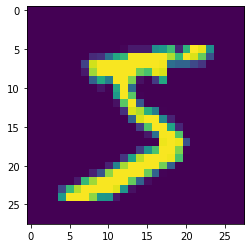

In [85]:
predictions= model.predict(x_train)
print(class_names[np.argmax(predictions[0])])
plt.imshow(x_train[0])
plt.show()

In [ ]:
y_test.shape

five


c:\python\python38\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


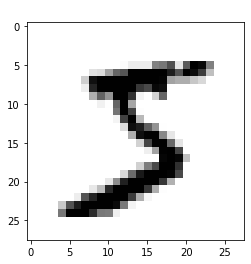

zero


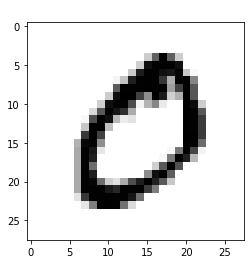

four


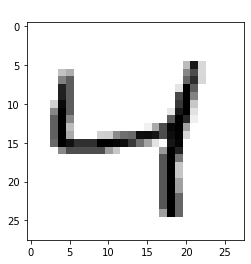

one


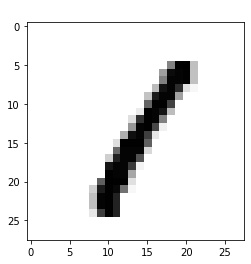

nine


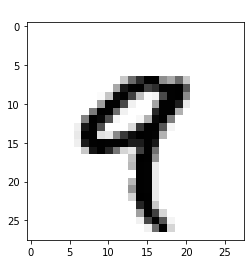

two


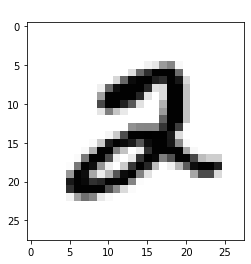

one


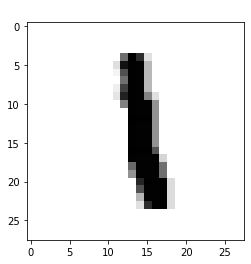

three


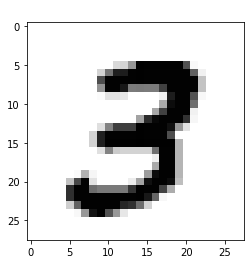

one


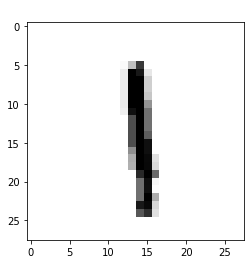

four


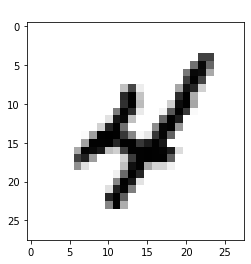

In [90]:
predictions= model.predict(x_train)

def output_pred(i):
    print(class_names[np.argmax(predictions[i])])
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()
    
for i in range(10):
    output_pred(i)